In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = []
  for row in data:
    result.append(row[index])
  return result 

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)
  
  tv_data = get_column(data, 0)
  
  radio_data = get_column(data, 1)
  
  newspaper_data = get_column(data, 2)
  
  sales_data = get_column(data, 3)
  
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X, y

In [16]:
# Q1. A
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [19]:
import numpy as np
def initialize_params(n = 3):
  # w = [random.gauss(mu=0.0, sigma=0.01) for i in range(n)]
  # b = 0
  # return w, b
  return (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
  
def predict(X_data, weights, bias):
  return np.dot(weights, X_data) + bias

def mse(y, y_hat):
  return np.mean((y - y_hat)**2)

def compute_gradient_wi(x, y, y_hat):
  return -2*x*(y - y_hat)

def compute_gradient_b(y, y_hat):
  return -2*(y - y_hat)

def update_weight_wi(wi, dl_dwi, lr):
  return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr):
  return b - lr*dl_db

def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
  losses = []
  
  w1, w2, w3, b = initialize_params()
  
  N = len(y_data)
  for epoch in range(epoch_max):
    for i in range(N):
      x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
      y = y_data[i]
      y_hat = predict([x1, x2, x3], [w1, w2, w3], b)
      loss = mse(y, y_hat)
      losses.append(loss)
      
      # compute gradients
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)
      
      # update weights
      w1 = update_weight_wi(w1, dl_dw1, lr)
      w2 = update_weight_wi(w2, dl_dw2, lr)
      w3 = update_weight_wi(w3, dl_dw3, lr)
      b = update_weight_b(b, dl_db, lr)
      
      losses.append(loss)
    if epoch % 10 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
      
  return w1, w2, w3, b, losses

In [5]:
#Q2. A
y = predict([1, 1, 1], [0, 0.5, 0], 0.5)
print(y)

1.0


In [6]:
#Q3. A
l = mse(y_hat=1, y=0.5)
print(l)

0.25


In [7]:
#Q4. A
g_wi = compute_gradient_wi(x=1.0, y=1.0, y_hat=0.5)
print (g_wi)

-1.0


In [8]:
# Q5. B
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [11]:
# Q6. A
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print (after_wi)

1.000005


In [12]:
# Q7. A
after_b = update_weight_b(b=0.5, dl_db=-1, lr=1e-5)
print(after_b)

0.50001


Epoch 0, Loss 35.88705145412275
Epoch 10, Loss 33.09981879543382
Epoch 20, Loss 32.6387982635126
Epoch 30, Loss 32.18506698177735
Epoch 40, Loss 31.7371284349334


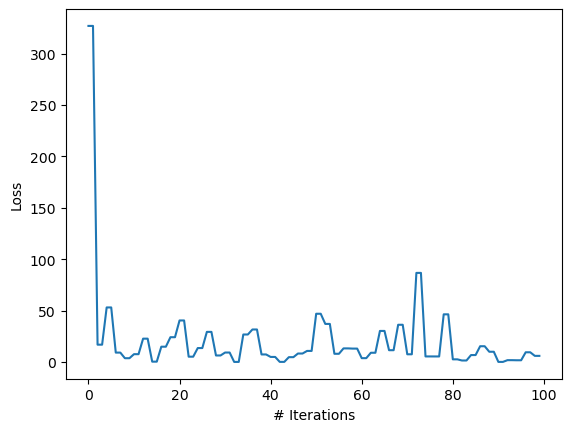

In [24]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('# Iterations')
plt.ylabel('Loss')
plt.show()

In [26]:
# Q8. A
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(np.round(w1, 3), np.round(w2, 3), np.round(w3, 3))

Epoch 0, Loss 35.88705145412275
Epoch 10, Loss 33.09981879543382
Epoch 20, Loss 32.6387982635126
Epoch 30, Loss 32.18506698177735
Epoch 40, Loss 31.7371284349334
0.074 0.159 0.018


In [27]:
# Q9. B
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict([tv, radio, newspaper], [w1, w2, w3], b)
print(f'predicted sales: {sales}')

Epoch 0, Loss 35.88705145412275
Epoch 10, Loss 33.09981879543382
Epoch 20, Loss 32.6387982635126
Epoch 30, Loss 32.18506698177735
Epoch 40, Loss 31.7371284349334
predicted sales: 8.176413319549825


In [28]:
# Q10. A
def mae(y, y_hat):
  return np.mean(np.abs(y - y_hat))
l = mae(y_hat=1, y=0.5)
print(l)

0.5


In [33]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr =1e-5) :
  losses = []
  w1, w2, w3, b = initialize_params()
  N = len(y_data)
  for epoch in range(epoch_max):
    loss_total = 0
    dw1_total = 0
    dw2_total = 0
    dw3_total = 0
    db_total = 0
    for i in range(N):
      x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
      y = y_data[i]
      y_hat = predict([x1, x2, x3], [w1, w2, w3], b)
      loss = mse(y, y_hat)
      
      # compute gradients
      dl_dw1 = compute_gradient_wi(x1, y, y_hat)
      dl_dw2 = compute_gradient_wi(x2, y, y_hat)
      dl_dw3 = compute_gradient_wi(x3, y, y_hat)
      dl_db = compute_gradient_b(y, y_hat)
      
      # accumulate gradients
      dw1_total += dl_dw1
      dw2_total += dl_dw2
      dw3_total += dl_dw3
      db_total += dl_db
      
      loss_total += loss
      
    
    w1 = update_weight_wi(w1, dw1_total / N, lr)
    w2 = update_weight_wi(w2, dw2_total / N, lr)
    w3 = update_weight_wi(w3, dw3_total / N, lr)
    b = update_weight_b(b, db_total / N, lr)
    losses.append(loss_total / N)
    if epoch % 10 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
      
  return w1, w2, w3, b, losses

In [35]:
# Q11. D

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(np.round(w1, 3), np.round(w2, 3), np.round(w3, 3))

Epoch 0, Loss 207.80090579443348
Epoch 10, Loss 3.1456237692180875
Epoch 20, Loss 1.8927740503463792
Epoch 30, Loss 1.0689250460992374
Epoch 40, Loss 0.5492063618538526
Epoch 50, Loss 0.24026016969345562
Epoch 60, Loss 0.0756151620606862
Epoch 70, Loss 0.008154953813408318
Epoch 80, Loss 0.004669232590886817
Epoch 90, Loss 0.0419153300924541
Epoch 100, Loss 0.10377451660303773
Epoch 110, Loss 0.17920136211807167
Epoch 120, Loss 0.2607473044016858
Epoch 130, Loss 0.3434996733341478
Epoch 140, Loss 0.4243210551813885
Epoch 150, Loss 0.5013055518636934
Epoch 160, Loss 0.57339147540135
Epoch 170, Loss 0.640086695825935
Epoch 180, Loss 0.7012749598306909
Epoch 190, Loss 0.7570802720455139
Epoch 200, Loss 0.8077727922367859
Epoch 210, Loss 0.8537043116106727
Epoch 220, Loss 0.8952647101999668
Epoch 230, Loss 0.9328532139019976
Epoch 240, Loss 0.9668600174022449
Epoch 250, Loss 0.9976551018538453
Epoch 260, Loss 1.0255819872732388
Epoch 270, Loss 1.050954816037527
Epoch 280, Loss 1.0740576359